# Python examples

This is a simple jupyter notebook with a range of examples of how to do useful things in python

For more information, examples and guides etc. to the modules used in this notebook, see the links below. Aside from cartopy, these are pretty comprehensive and easy to follow.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html
- https://geopandas.readthedocs.io/en/latest/docs.html
- http://xarray.pydata.org/en/stable/index.html
- https://scitools.org.uk/cartopy/docs/latest/

A jupyter notebook is composed of cells. These can be code or 'markdown' (basically just text that can be formatted in some basic ways).
To run a cell either click the 'Run' button in the toolbar above, or press Shift+Enter

The first code cell of any jupyter notebooks is usually the import statements, that import the modules that the rest of the code will use. Go ahead and run it below.

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy as cp
import xarray as xr
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
from utils import * # import some of my own functions

## Example 1
### Plotting a shape file

The next code cell here allows you to specify what file you would like to plot. I am reading in a shape file of gb catchments. I have put a copy of this file in the same folder as this notebook. Go ahead and edit the filepath to this file, then run it.

In [30]:
sfname1 = 'example_data/gb_catchments.shp'

Read in shapefile using geopandas. This will put each 'shape' in the shapefile (vector, polygon, point etc.) into it's own row in a table

In [31]:
shp_gpd1 = gpd.read_file(sfname1)

Print out what this looks like

In [32]:
shp_gpd1

,OBJECTID,ID_STRING,ID,SHAPE_AREA,SHAPE_LEN,geometry
0,227,18010,18010.0,0.0,0.0,"POLYGON ((271449.998 695224.998, 271400 695224..."
1,244,21014,21014.0,0.0,0.0,"POLYGON ((310900.002 628474.999, 311150.002 62..."
2,245,21015,21015.0,0.0,0.0,"POLYGON ((356475.002 638850.002, 356349.999 63..."
3,247,21017,21017.0,0.0,0.0,"POLYGON ((323424.998 613149.998, 323375 613100..."
4,269,22004,22004.0,0.0,0.0,"POLYGON ((421150.002 612925, 421225.001 612850..."
...,...,...,...,...,...,...
1888,174,21003,21003.0,0.0,0.0,"POLYGON ((325775.002 640050, 325775.002 640000..."
1889,187,19021,19021.0,0.0,0.0,"POLYGON ((333800.001 667825.002, 333900.002 66..."
1890,197,20806,20806.0,0.0,0.0,"POLYGON ((363849.998 677374.998, 364024.998 67..."
1891,204,17004,17004.0,0.0,0.0,"POLYGON ((333000 699774.998, 333100.001 699774..."


Change the plot figures size so that it's nice and big

In [33]:
plt.rcParams['figure.figsize'] = [9.5, 6]

Plot every shape in the shapefile. Only plot the edges of the shapes, don't fill them with any colour.
Once you have run this cell, the interactive plot window will appear. Play around with the buttons at the bottom of the plot and see what they do. You can click and drag the plot around, zoom in and out, save it and reset it. Press the blue on/off button in the top right of the plot when you are done editing. You may have to scroll the cell to the right to see this if your screen is small.

<Axes: >

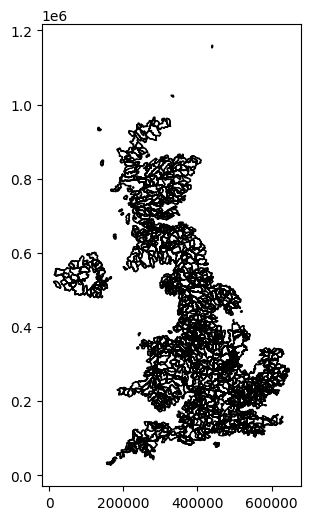

In [34]:
shp_gpd1.plot(facecolor='none', edgecolor='black')

## Example 2
### Only plotting selected shapes from the shapefile

#### Simple indexing

Select out the first 10 rows (i.e. shapes) of the shapefile and plot them

In [7]:
shp_gpd1.iloc[1:10,:].plot()

<IPython.core.display.Javascript object>

<Axes: >

Not very helpful huh? Let's select out some specific catchments instead

#### Label-based indexing

First, set the column containing the catchment ID as the row index (i.e. the names of the rows) which makes selecting catchments based on their ID a lot easier

In [8]:
shp_gpd2 = shp_gpd1.set_index('ID_STRING')

 The 'loc' method of indexing is the same as numpy i.e. data[row_index,col_index], except with pandas you can instead use the names of the rows/columns instead of the indices. You can provide a list of row names or column names, too.

The row names is the index, by default this is just the row number, but we set this to be the catchment IDs. The column names are the... column names. They are both easy to see if you display the table

In [9]:
shp_gpd2

,OBJECTID,ID,SHAPE_AREA,SHAPE_LEN,geometry
ID_STRING,,,,,
18010,227,18010.0,0.0,0.0,"POLYGON ((271449.998 695224.998, 271400 695224..."
21014,244,21014.0,0.0,0.0,"POLYGON ((310900.002 628474.999, 311150.002 62..."
21015,245,21015.0,0.0,0.0,"POLYGON ((356475.002 638850.002, 356349.999 63..."
21017,247,21017.0,0.0,0.0,"POLYGON ((323424.998 613149.998, 323375 613100..."
22004,269,22004.0,0.0,0.0,"POLYGON ((421150.002 612925, 421225.001 612850..."
...,...,...,...,...,...
21003,174,21003.0,0.0,0.0,"POLYGON ((325775.002 640050, 325775.002 640000..."
19021,187,19021.0,0.0,0.0,"POLYGON ((333800.001 667825.002, 333900.002 66..."
20806,197,20806.0,0.0,0.0,"POLYGON ((363849.998 677374.998, 364024.998 67..."


In [10]:
thamestok = shp_gpd2.loc[['39001','12001'],:]

In [11]:
thamestok.plot()

<IPython.core.display.Javascript object>

<Axes: >

#### Selecting out catchments/shapes with particular characteristics 

Now let's try and plot all the Thames catchments, not just the Kingston one

To do this we need to select out the rows of the table where the ID is 39???, i.e. > 39000 and < 40000.
There are various ways of doing this, here is one:

In [12]:
thames = shp_gpd1.loc[lambda df: df['ID'] > 39000].loc[lambda df: df['ID'] < 40000]

Here is the detailed explanation for those who want it!
 Lambda functions work like this:
 'lambda input_variable: output_variable' where the output_variable is usually not given a name, but is some manipulation of the input variable. The name of
 the input_variable is also not important, often it is just 'x'.
 Here, we pass in a dataframe (what geopandas stores it's info in) and return
 a dataseries (a 1 column dataframe, not really important to know this) where
 the value at each row is 'TRUE' if the ID column of the passed-in dataset is >39000
 and 'FALSE' if not. Geopandas then uses this dataseries to select out only the rows
 (shapes) of the original dataset that correspond to those that are 'TRUE' in the
 dataseries coming out of the function, i.e. those where the 'ID' column is >39000.
 We then pass this output dataframe through another function that only selects out
 those rows with 'ID' <40000, so that we are left with only those with 39xxx IDs.


Plot the shapes of the subsetted dataframe. Black edges, no shape fill

In [13]:
thames.plot(facecolor='none', edgecolor='black')

<IPython.core.display.Javascript object>

<Axes: >

## Example 3
### Adding in coastlines and rivers using cartopy

Create some axes with the map projection you want to use. Since we are plotting the UK we can use the OSGB projection.
This will just create a blank set of (interactive) axes. These will fill in as we run the following commands.

In [14]:
gbax = plt.axes(projection=cp.crs.OSGB())

Add coastlines to the plot

In [15]:
gbax.coastlines(resolution='10m')

Plot our shapefile on this set of axes since we have not specified them, the fill colour and edge colour will be the default (blue).

In [16]:
shp_gpd1.plot(ax=gbax)

<GeoAxes: >

We're now done with this plot, so click the on/off blue button in the top right corner of it to finalize it.
(You will run into issues if you try and have more than one plot open like this at a time).

Now just plot the Thames catchments on a new plot. Create a new set of axes as before

In [17]:
gbax2 = plt.axes(projection=cp.crs.OSGB())

Usually, when we add data to set of axes, the x and y limits of the plot change automatically depending on the data. But here we want to see where the Thames catchments are in the UK, so we force the axes to retain their original 'global' limits with this line:

In [18]:
gbax2.set_global()

Add coastlines as before

In [19]:
gbax2.coastlines(resolution='10m')

Plot the thames subset of catchments on these axes

In [20]:
thames.plot(ax=gbax2)

<GeoAxes: >

Now close the plot as before

## Example 4
### More complicated indexing/subsetting

Plotting only the biggest catchments for each river

In [21]:
sfname1 = 'example_data/gb_catchments.shp'
shp_gpd1 = gpd.read_file(sfname1)

Add in a new column to the dataframe that shows the area encompassed by each shape.

In [22]:
shp_gpd1['catchment_area']=shp_gpd1.area

Show what the new geodataframe looks like

In [23]:
shp_gpd1

,OBJECTID,ID_STRING,ID,SHAPE_AREA,SHAPE_LEN,geometry,catchment_area
0,227,18010,18010.0,0.0,0.0,"POLYGON ((271449.998 695224.998, 271400 695224...",3.913012e+08
1,244,21014,21014.0,0.0,0.0,"POLYGON ((310900.002 628474.999, 311150.002 62...",1.387013e+08
2,245,21015,21015.0,0.0,0.0,"POLYGON ((356475.002 638850.002, 356349.999 63...",2.390687e+08
3,247,21017,21017.0,0.0,0.0,"POLYGON ((323424.998 613149.998, 323375 613100...",3.859125e+07
4,269,22004,22004.0,0.0,0.0,"POLYGON ((421150.002 612925, 421225.001 612850...",2.029238e+08
...,...,...,...,...,...,...,...
1888,174,21003,21003.0,0.0,0.0,"POLYGON ((325775.002 640050, 325775.002 640000...",6.980112e+08
1889,187,19021,19021.0,0.0,0.0,"POLYGON ((333800.001 667825.002, 333900.002 66...",1.559963e+08
1890,197,20806,20806.0,0.0,0.0,"POLYGON ((363849.998 677374.998, 364024.998 67...",6.783751e+06
1891,204,17004,17004.0,0.0,0.0,"POLYGON ((333000 699774.998, 333100.001 699774...",1.593312e+08


The catchment IDs are structured to have the first 2 digits identifying the river basin and the following 3 the catchments within, i.e. RRccc So each thousand corresponds to a different river basin. So to loop over each river basin we need a list of numbers that increments by 1000:

In [24]:
cats = np.arange(1000, 237000, 1000) # 'from 1000 to 237000 incrementing by 1000'

Select out the biggest catchment from each river basin:

In [25]:
largestlist = [] # empty list to store the largest catchments
for cat in cats: # loop over each river basin (1000 -> 2000 -> 3000 -----> 236000)
    # select out the catchments corresponding to each river basin, like we did in
    # example 2
    pdcats = shp_gpd1.loc[lambda df: df['ID'] > cat].loc[lambda df: df['ID'] < cat+1000]
    # some multiples of 1000 don't correspond to any river basin:
    if len(pdcats) == 0: # so there won't be any catchments selected
        print('No ' + str(cat) + ' cats')
    else: # but for those that do:
        # sort the catchments by their area column and select out the last row
        # (the one with the largest area)
        largestcat = pdcats.sort_values('catchment_area').iloc[[-1],:]
        largestlist.append(largestcat) # add to the list of largest catchments

No 98000 cats
No 100000 cats
No 103000 cats
No 104000 cats
No 109000 cats
No 110000 cats
No 111000 cats
No 112000 cats
No 113000 cats
No 114000 cats
No 115000 cats
No 116000 cats
No 117000 cats
No 118000 cats
No 119000 cats
No 120000 cats
No 121000 cats
No 122000 cats
No 123000 cats
No 124000 cats
No 125000 cats
No 126000 cats
No 127000 cats
No 128000 cats
No 129000 cats
No 130000 cats
No 131000 cats
No 132000 cats
No 133000 cats
No 134000 cats
No 135000 cats
No 136000 cats
No 137000 cats
No 138000 cats
No 139000 cats
No 140000 cats
No 141000 cats
No 142000 cats
No 143000 cats
No 144000 cats
No 145000 cats
No 146000 cats
No 147000 cats
No 148000 cats
No 149000 cats
No 150000 cats
No 151000 cats
No 152000 cats
No 153000 cats
No 154000 cats
No 155000 cats
No 156000 cats
No 157000 cats
No 158000 cats
No 159000 cats
No 160000 cats
No 161000 cats
No 162000 cats
No 163000 cats
No 164000 cats
No 165000 cats
No 166000 cats
No 167000 cats
No 168000 cats
No 169000 cats
No 170000 cats
No 171000 c

Concatenate the list of geodataframes (i.e. the rows of the original data frame that correspond to the largest catchments in each river basin) into one geodataframe.

In [26]:
largestcats = pd.concat(largestlist, ignore_index=True)

Now we have successfully extracted out only the shapes of the shapefile that correspond to the largest catchment of each river basin (i.e. the river basin itself) we can plot them like we did before

In [27]:
ax = plt.axes(projection=cp.crs.OSGB())
ax.set_global()
ax.coastlines(resolution='10m')
# this time we set the edge colour of the shapes to blue
largestcats.plot(ax=ax, facecolor='none', edgecolor='blue')

<GeoAxes: >

Remember to close the plot when you're done.

## Example 5
### Simple plot of spatial netcdf data with customisations, country boundaries and rivers

Read in gridded dataset to plot. The '.squeeze()' at the end removes any singleton dimensions that might be lying around.

In [28]:
yields = xr.load_dataarray('example_data/grass_era5_aphrodite_2014.nc').squeeze()

FileNotFoundError: [Errno 2] No such file or directory: '/home/joe/github.com/ukceh-rse/gridded_data_tips/example_data/grass_era5_aphrodite_2014.nc'

Set up the axes. Note the different projection this time, as we are not over the UK. This projection is a sortof 'default' that you can use if you just want a reasonable looking map/don't want to think about map projections

In [ ]:
ax = plt.axes(projection=cp.crs.PlateCarree())

Load shapefiles of country boundaries and rivers. These can be downloaded from the Natural Earth website, but cartopy has the ability to download and plot them on the fly. Take a look at the website to see what is available.

In [ ]:
countries = cp.feature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black', facecolor='none')
rivers = cp.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='blue', facecolor='none', lw=0.5)

Add the hi-res country boundaries and rivers to the map (might take a few moments)

In [ ]:
ax.add_feature(countries)
ax.add_feature(rivers)

In [ ]:
# to add low-res, but preloaded country boundaries and rivers, use the following:
#ax.add_feature(cp.feature.RIVERS)
#ax.add_feature(cp.feature.BORDERS)

Plot the dataset (remember the axes will automatically resize to fit the data)

In [ ]:
yplot = yields.plot.pcolormesh(ax=ax, cmap='YlGn')

Change the title if it's not correct

In [ ]:
ax.set_title('Yields')

Add lat/lon labels.

The 'alpha = 0' here makes the gridlines invisible so that we only see the labels. But if you want to see the gridlines, remove this or set it to 1.

In [ ]:
gl = ax.gridlines(crs=cp.crs.PlateCarree(), draw_labels=True, alpha=0)

# This disables any labels along the top and right of the plot
gl.xlabels_top = False
gl.ylabels_right = False

# This formats the rest of the labels nicely
gl.xformatter = cp.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cp.mpl.gridliner.LATITUDE_FORMATTER

For some reason you might need to click on the plot to make these appear.

In [ ]:
# save the figure if you want
plt.savefig('plot.png', dpi=300)

## Example 6

### Subsetting spatial netcdf data using a shapefile 

I.e. selecting out specific catchments.

Note that this uses some functions that I have written(/heavily copied from stackoverflow) and that exist in a python script in this folder. To use these functions you will also have to have this script in the same folder as this notebook.

First, read in the netcdf data using xarray:

In [ ]:
abtots = xr.load_dataarray('example_data/abtotal_gridpoint_totals.nc')

Use my fancy function to subset the data. It requires the xarray dataset, name of the shapefile, the name of the field/attribute/characteristic of the shapes in the shapefile that we're using to subset, and then the value(s) of this field that we want to extract out.
So in this catchment shapefile, the catchments have an attribute called 'ID_STRING' which is the NRFA ID of the catchment. We will look at the Thames-to-Kingston catchment, 39001. 

In [ ]:
sfname = 'example_data/20190828_Catchments.shp'
abtots39001 = catchment_subset_shapefile(data=abtots, sfname=sfname, IDname='ID_STRING', IDs=['39001'])

Find the sum of the data, which will be just the data within catchment 39001

In [ ]:
abtots39001.sum()

Now lets plot it

If we also want to plot the catchment boundary we will need to select out this specific catchment shape from the shapefile as well. This is easier if we set the 'ID_STRING' as the *index* of the pandas geodataframe. The index is what identifies each row, rather than just the row numbers, which is the default.

In [ ]:
cats = gpd.read_file(sfname)
cats = cats.set_index('ID_STRING')

Now we can just use this to easily select out the catchment ID we want 

In [ ]:
cat39001 = cats.loc[['39001'],:]

Mask out any data that is 0 or lower

In [ ]:
abtots39001 = abtots39001.where(abtots39001 > 0)

The plotting code. Note that we have added in a 'zorder' argument to the plotting calls. This determines the order in which the data are shown on the plot, so the data with a zorder of 1 will plot on top of data with a zorder of 0 or lower, for example. This way the catchment boundary won't be obscured by the data pixels.

In [ ]:
gbax = plt.axes(projection=cp.crs.OSGB())
gbax.coastlines(resolution='10m')
cat39001.plot(ax=gbax, facecolor='None', edgecolor='Blue', zorder=1)
rivers = cp.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', edgecolor='blue', facecolor='none', lw=0.5)
gbax.add_feature(rivers)
abtots39001.plot(ax=gbax, cmap='Reds', zorder=0)

You will need to zoom in on the plot to see the data more clearly. Use the buttons at the bottom left of the plot window to do this.

Remember to close the plot when you are done.

## Example 7
### Handling/manipulating/processing netcdf data using xarray

Create an xarray from an existing numpy array

In [ ]:
pda = np.arange(0,50).reshape(5,10) # create dummy data array
xs = np.arange(0, 10000, 1000)
ys = np.arange(0, 5000, 1000) # create coordinates
pdxr = xr.DataArray(pda, coords=[ys, xs], dims=['y', 'x']) # create xarray

See what it looks like

In [ ]:
pdxr

Select out data using indices (just like numpy, nothing complicated here)

In [ ]:
pdxr[0,0]

Select out data using coordinates

In [ ]:
pdxr.sel(x=1000, y=1000)

Can also find the nearest point to the specified coords

In [ ]:
pdxr.sel(x=900, y=900, method='nearest') 

Or can use:

In [ ]:
pdxr.loc[1000, 1000]

What about time?

In [ ]:
tdxr = xr.load_dataset('example_data/total_precipitation_2000.nc') # read in some daily data

Take a look at it

In [ ]:
tdxr

Note that it has more than one variable and therefore is a dataset in xarray language. Most of the stuff we can do with data arrays we can do with datasets, but we won't cover it here.

To proceed, we'll just select out the variable we want (tp) and work with that.

In [ ]:
tdxr = tdxr['tp']

Take a look and note the difference between this and the above dataset

In [ ]:
tdxr

Select one particular day

In [ ]:
tdxr_p1 = tdxr.sel(time='2000-07-04') 

Select an entire month

In [ ]:
tdxr_p2 = tdxr.sel(time='2000-07')

Select a time range

In [ ]:
tdxr_tr = tdxr.sel(time=slice('2000-09-01', '2000-12-31')) 

Computing the mean over specified dimensions

In [ ]:
pdxr_mean = tdxr.mean(dim=['time'])

Computing time-means

In [ ]:
pdxr_monmean = tdxr.groupby('time.month').mean() # e.g. monthly mean

Mean of a specific time range

In [ ]:
tdxr_trm = tdxr.sel(time=slice('2000-09-01', '2000-12-31')).mean(dim=['time']) 

Interpolating onto a new grid

In [ ]:
newxs = np.arange(500, 10500, 1000)
newys = np.arange(500, 5500, 1000) # create new coordinates

Default method is linear

In [ ]:
pdxr_int1 = pdxr.interp(x=list(newxs), y=list(newys)) 

But can also use nearest-neighbour, among others

In [ ]:
pdxr_int2 = pdxr.interp(x=list(newxs), y=list(newys), method='nearest') 

Processing multifile data and data larger than the available memory/ram. This requires the dask module to be installed. Computations, such as means, sums, interpolations, etc. are only actually carried out when you want to view/plot the data or save it.

In [ ]:
pdmf = xr.open_mfdataset('example_data/total_precipitation_????.nc', combine='by_coords', parallel=True)

Calculate the mean for each calendar month (like a climatology) this calculation will appear to run very quickly but will not actually have run

In [ ]:
pdmf_m = pdmf.groupby('time.month').mean()

If your dataset is very big (like, 10s of GBs), after processing it to reduce the data size in some way, e.g. means, it is better to save it to disk and then read it back in directly to memory before doing any futher processing, such as plotting. Because each time you want to plot the data, e.g. different slices, it will have to do the meaning operation, which might take several minutes. Better to do this just once!

In [ ]:
with ProgressBar():
    pdmf_m.to_netcdf('total_precip_climmonmean.nc')

Read back in ready for plotting

In [ ]:
pdmf_m = xr.load_dataset('total_precip_climmonmean.nc')['tp']

Select out one month

In [ ]:
pdmf_m_jan = pdmf_m.sel(month=12)

Plot it

In [ ]:
pdmf_m_jan.plot()

## Example 8

### Interactive hydrographs

In [ ]:
obsfile= 'example_data/obsflows.csv'

This next code cell reads the data into memory using pandas. I won't go in to detail on pandas here, but suffice to say it is a very powerful module that can process all sorts of 2-dimensional data whilst retaining row and column names and handling timeseries data easily.

In [ ]:
obs = pd.read_csv(obsfile, parse_dates={'Times': [0,1,2]}, dayfirst=True, engine='python')
obs.set_index('Times', inplace=True)

Finally let's plot the data. Edit the start and end times of the plot and the catchment you'd like to plot in the first few lines below. Once you have run this cell, the interactive plot window will appear. Play around with the buttons at the bottom of the plot and see what they do. You can click and drag the plot around, zoom in and out, save it and reset it. Press the blue on/off button in the top right of the plot when you are done editing. 

In [ ]:
# timeperiod and gauge ID to plot
startplot = '2000-01-01'
endplot   = '2015-12-31'
catchmentplot = '39010'

obsplot = obs[startplot:endplot]

plt.rcParams.update({'font.size': 10})
ax = plt.gca()
obsplot[catchmentplot].plot(ax=ax, label = 'obsflows')
ylims = ax.get_ylim()
ax.set_ylim([0, ylims[1]])
plt.title(catchmentplot)
plt.ylabel('Daily mean flow (' + r'$m^3$' + ')')
plt.legend()

I find the save function of the interactive plot can be a bit dodgy. Instead, once you have finished with the plot (and pressed the button in the top right) you can right click on it and select 'save image as'.

Alternatively, you can add the following line to the bottom of the above code cell to save it in higher quality, but note that this will not work if you run this line separately.

In [ ]:
plt.savefig('myfirstpythonplot.png', dpi=300)

## Example 9
### Plotting a spatial animation over time

This a more complicated example as we have to manually create the plot for each frame - we can't rely on xarray's automation of plots. Another way of doing this is to use a loop to create each frame and save it as a png, then use ffmpeg to convert them into a movie, or 'convert' to convert them into a gif. However, both of these have issues. ffmpeg is bloody complicated and has a million different unobvious options if you're basically not a video editor/codec expert and I could never get it to do exactly what I wanted, and convert is very inefficient, produces unnecessarily large gif files and uses up a lot of memory, to the point where you can't use it if animating more than ~60files. 
This example is also quite complicated, but I found it easier to work with.

Edit the input data and options as necessary. Currently assumes the datafile only has one year of data in it. If more, it will either fail or only plot the first year.

In [ ]:
data = xr.load_dataarray('example_data/biomass_deficit_wheat_era5_aphrodite_1992.nc') # location of the file
lonname = 'x' # name of the x dimension
latname = 'y' # name of the y dimension
timname = 't' # name of the t dimension
startdate = '1991-10-01' # start date of the animation (e.g the first time in the data file)
plotlab=None # label for colbar. Set to None for automatic
outname='/users/sgsys/matbro/plots/example_animation' # where to put the file + the first part of the output filename
title='Biomass deficit (g/m^2)' # title to put on plot. Set to None for automatic
colmap='Reds' # colour map to use, see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
vmin=0.01 # lower colourmap boundary
vmax=None # upper colourmap boundary, set to None for automatic
ext='mp4' # gif or mp4 (latter is recommended)

In [ ]:
# create the directory to store the animation in if it doesn't exist
dirname = os.path.split(outname)[0]
if not os.path.exists(dirname):
    os.mkdir(dirname)

# reorder the dimensions so that they are always in the same order
# to make the rest of the code a little easier
data = data.transpose(latname, lonname, timname)

# extract out x and y coordinates
lons = data[lonname].values
lats = data[latname].values

# Assumes data is yearly, and checks to see if it is a leap year or not,
# based on the length of the time dimension in the data
if len(data[timname]) > 365:
    endstep = 366
else:
    endstep = 365

############################# CREATE THE FIRST FRAME ###########################
#
# as earlier examples, set up the plot with coastlines and country borders
fig = plt.figure()
ax1 = plt.axes(projection = cp.crs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.add_feature(cp.feature.BORDERS, linestyle='-', alpha=.5)

# set the geographical extent of the plot and add in the x/y axis labels
# currently assumes they are lat/lon not easting/northing
ax1.set_extent((lons[0], lons[-1], lats[0], lats[-1]))
gl = ax1.gridlines(draw_labels=True, alpha=0)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# set the title of the plot to the date of each frame
# strptime takes a string and creates a python datetime object from it
# on which many time-y functions can be done, which becomes useful when
# we get to the animation part, as we can then easily add on a day each frame
startdate = dt.datetime.strptime(startdate, '%Y-%m-%d')
# strftime takes a datetime object and formats it according to the provided
# formatting codes. So in essence what we have done is taken the provided
# date and reformatted it into a different format
ax1.set_title(title + ' ' + startdate.strftime('%b %d %Y'))

# Set the colourbar limits if present, otherwise set to the data max/min
if vmax is not 'None':
    maxval=vmax
else:
    maxval = data.max()
if vmin is not 'None':
    minval=vmin
else:
    minval = data.min()

# plot the first frame using matplotlib
pcm = ax1.pcolormesh(lons, lats, data[:,:,0].values, vmin=minval, vmax=maxval, cmap=colmap)
pcm.cmap.set_under('white') # set the colour of any values below vmin
# manually create a colourbar
cbaxes=fig.add_axes([0.05, 0.1, 0.05, 0.8])
plt.colorbar(pcm, cax=cbaxes, extend='both')
cbaxes.yaxis.set_label_position("left")
cbaxes.yaxis.tick_left()
# set the ylabel of the colourbar to the provided value, if present
# otherwise try the xarray dataarray name and failing that, leave it blank
if not plotlab:
    try:
        plotlab = data.name
    except AttributeError:
        plotlab = ''
cbaxes.set_ylabel(plotlab)


############################## CREATE THE ANIMATION FUNCTION ########################
#
# The animation function
# This defines what we want to happen everytime matplotlib plots a new frame
# It has to have one input, the frame number, and one output, the 'plot handle'
# (the object returned when you plot something)
def animate(f):
    print('Plotting frame ' + str(f+1)) # tell us what frame we're on
    ax1.clear() # clear the axes of the current plot
    ax1.coastlines(resolution='10m') #redraw the coastlines
    if sfile:
        ax1.add_feature(rivers)
    # redraw the borders
    ax1.add_feature(cp.feature.BORDERS, linestyle='-', alpha=.5)
    # re-set the extent
    ax1.set_extent((lons[0], lons[-1], lats[0], lats[-1]))
    # redraw the axis labels
    gl = ax1.gridlines(draw_labels=True, alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    # re-set the title, noting that we are incrementing the date by one day each time
    ax1.set_title(title + ' ' + (startdate + dt.timedelta(f)).strftime('%b %d %Y'))
    # replot the data, noting that we are incrementing through the time axis,
    # plotting the next frame each time
    pcm = ax1.pcolormesh(lons, lats, data[:,:,f].values, vmin=minval, vmax=maxval, cmap=colmap)
    # reset the colourbar 'set-under' property
    pcm.cmap.set_under('white')
    return pcm,
##############################################################################################

# use the animation function to create the animation
# you need to provide the figure handle, animation function, 
# and frame numbers you want to plot. Setting 'blit=True' means that
# only the bits of the plot that actually change from frame to
# frame will be redrawn. This is much more efficient.
anim = animation.FuncAnimation(fig, animate, range(0,endstep), blit=True)

# save the plot using ffmpeg to create an mp4, or convert to create a gif
# mp4 is much more efficient in terms of file size and memory
if ext=='mp4':
    anim.save(outname + '.mp4', fps=10, dpi=300, bitrate=10000, writer='ffmpeg')
elif ext=='gif':
    anim.save(outname + '.gif', writer='imagemagick', fps=10, dpi=300)
else:
    raise Error('format ' + ext + 'not supported')

print('Animation saved to ' + outname + '.' + ext)

plt.close()
